In [1]:
%run ./frocc.ipynb

In [2]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
# http://odds.cs.stonybrook.edu/speech-dataset/
raw_data = loadmat("datasets/speech.mat")

In [4]:
size = len(raw_data['y'])
y = raw_data['y'].flatten()
x = raw_data['X']
num_outliers = y.sum()

y_outliers = y[:num_outliers]
x_outliers = x[:num_outliers]

y_inliers = y[num_outliers:]
x_inliers = x[num_outliers:]

In [5]:
y_inliers.shape

(3625,)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
  x_inliers, y_inliers, test_size=0.3
)

In [7]:
y_test = np.concatenate((y_test, y_outliers))
x_test = np.concatenate((x_test, x_outliers))

In [8]:
def run(m, eps, output=True):
  d = x.shape[1]

  detector = frocc(m, eps, d)
  detector.train(x_train)
  y_pred = detector.test(x_test)

  tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
  tpr = tp/(tp + fn)
  fpr = fp/(fp + tn)
  acc = (tp + tn)/(tp + fn + fp + tn)

  if output:
    print("TP:  {} \t FN:  {}".format(tp, fn))
    print("FP:  {} \t TN:  {}".format(fp, tn))
    print("TPR: {:.3f} \t FPR: {:.3f}".format(tpr, fpr))
    print("ACC: {:.3f} \t LR+: {:.3f}".format(acc, tpr/fpr))
  return tpr/fpr

In [23]:
run(20, 0.001)

TP:  1068 	 FN:  20
FP:  60 	 TN:  1
TPR: 0.982 	 FPR: 0.984
ACC: 0.930 	 LR+: 0.998


0.9979779411764705

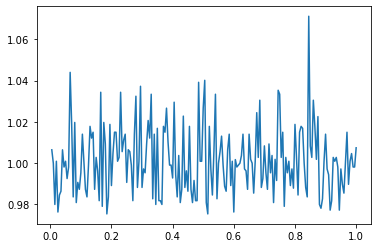

In [13]:
n = 200
m = 20
epsilons = np.arange(1/n, 1 + 1/n, 1/n)
lr_plus = np.zeros((n,1))
for i in range(n):
  lr_plus[i] = run(m, epsilons[i], False)

plt.plot(epsilons, lr_plus);